___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

In this project, you must apply EDA processes for the development of predictive models. Handling outliers, domain knowledge and feature engineering will be challenges.

Also, this project aims to improve your ability to implement algorithms for Multi-Class Classification. Thus, you will have the opportunity to implement many algorithms commonly used for Multi-Class Classification problems.

Before diving into the project, please take a look at the determines and tasks.

## Determines

The 2012 US Army Anthropometric Survey (ANSUR II) was executed by the Natick Soldier Research, Development and Engineering Center (NSRDEC) from October 2010 to April 2012 and is comprised of personnel representing the total US Army force to include the US Army Active Duty, Reserves, and National Guard. In addition to the anthropometric and demographic data described below, the ANSUR II database also consists of 3D whole body, foot, and head scans of Soldier participants. These 3D data are not publicly available out of respect for the privacy of ANSUR II participants. The data from this survey are used for a wide range of equipment design, sizing, and tariffing applications within the military and has many potential commercial, industrial, and academic applications.

The ANSUR II working databases contain 93 anthropometric measurements which were directly measured, and 15 demographic/administrative variables explained below. The ANSUR II Male working database contains a total sample of 4,082 subjects. The ANSUR II Female working database contains a total sample of 1,986 subjects.


DATA DICT:
https://data.world/datamil/ansur-ii-data-dictionary/workspace/file?filename=ANSUR+II+Databases+Overview.pdf

---

To achieve high prediction success, you must understand the data well and develop different approaches that can affect the dependent variable.

Firstly, try to understand the dataset column by column using pandas module. Do research within the scope of domain (body scales, and race characteristics) knowledge on the internet to get to know the data set in the fastest way. 

You will implement ***Logistic Regression, Support Vector Machine, XGBoost, Random Forest*** algorithms. Also, evaluate the success of your models with appropriate performance metrics.

At the end of the project, choose the most successful model and try to enhance the scores with ***SMOTE*** make it ready to deploy. Furthermore, use ***SHAP*** to explain how the best model you choose works.

## Tasks

*** Exploratory Data Analysis (EDA) ***
- Import Libraries, Load Dataset, Exploring Data

    *i. Import Libraries*
    
    *ii. Ingest Data *
    
    *iii. Explore Data*
    
    *iv. Outlier Detection*
    
    *v.  Drop unnecessary features*

*** Data Preprocessing ***
- Scale (if needed)
- Separete the data frame for evaluation purposes

*** Multi-class Classification ***
- Import libraries
- Implement SVM Classifer
- Implement Decision Tree Classifier
- Implement Random Forest Classifer
- Implement XGBoost Classifer
- Compare The Models



# EDA
- Drop unnecessary colums
- Drop DODRace class if value count below 500 (we assume that our data model can't learn if it is below 500)

## Import Libraries
Besides Numpy and Pandas, you need to import the necessary modules for data visualization, data preprocessing, Model building and tuning.

*Note: Check out the course materials.*

In [326]:
# libraries for EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import plotly
import plotly.express as px

plt.rcParams['figure.figsize']=(12,6)
sns.set_style("whitegrid", {'axes.grid' : False})

pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# # sklearn library for machine learning algorithms, data preprocessing, and evaluation
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier

from sklearn.model_selection import cross_val_score, cross_validate, train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, log_loss, make_scorer
from sklearn.metrics import classification_report,confusion_matrix, plot_confusion_matrix, average_precision_score
from sklearn.metrics import roc_curve, auc

# yellowbrick library for visualizing the model performance
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.cluster import KElbowVisualizer 


# # to get rid of the warnings
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

## Ingest Data from links below and make a dataframe
- Soldiers Male : https://query.data.world/s/h3pbhckz5ck4rc7qmt2wlknlnn7esr
- Soldiers Female : https://query.data.world/s/sq27zz4hawg32yfxksqwijxmpwmynq

In [327]:
df_f = pd.read_csv("./ANSUR II FEMALE Public.csv")
df_f.head()

,SubjectId,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10037,231,1282,301,204,1180,222,177,373,315,263,466,65,338,301,141,1011,223,836,587,476,360,1336,274,922,245,1095,759,557,310,35,65,16,220,713,91,246,316,265,517,432,1028,75,182,184,141,548,191,314,69,345,388,966,645,363,399,435,496,447,55,404,118,335,368,1268,113,362,235,1062,327,148,803,809,513,1647,1560,1280,1013,622,174,736,430,110,844,1488,406,295,850,217,345,942,657,152,756,Female,5-Oct-10,Fort Hood,Regular Army,Combat Support,92Y,Germany,2,NaN,2,26,61,142,Right hand
1,10038,194,1379,320,207,1292,225,178,372,272,250,430,64,294,270,126,893,186,900,583,483,350,1440,261,839,206,1234,835,549,329,32,60,23,208,726,91,249,341,247,468,463,1117,78,187,189,138,535,180,307,60,315,335,1048,595,340,375,483,532,492,69,334,115,302,345,1389,110,426,259,1014,346,142,835,810,575,1751,1665,1372,1107,524,152,771,475,125,901,1470,422,254,708,168,329,1032,534,155,815,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,25U,California,3,Mexican,3,21,64,120,Right hand
2,10042,183,1369,329,233,1271,237,196,397,300,276,450,69,309,270,128,987,204,861,583,466,384,1451,287,874,223,1226,821,643,374,36,65,26,204,790,100,265,343,262,488,469,1060,84,198,195,146,588,207,331,70,356,399,1043,655,345,399,470,530,469,64,401,135,325,369,1414,122,398,258,1049,362,164,904,855,568,1779,1711,1383,1089,577,164,814,458,129,882,1542,419,269,727,159,367,1035,663,162,799,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,35D,Texas,1,NaN,1,23,68,147,Right hand
3,10043,261,1356,306,214,1250,240,188,384,364,276,484,68,340,294,144,1012,253,897,599,471,372,1430,269,1008,285,1170,804,640,351,38,62,22,244,775,97,265,331,309,529,455,1069,80,192,186,153,593,206,332,68,337,402,1029,655,392,435,469,520,478,67,402,118,357,386,1329,115,394,250,1121,333,157,875,815,536,1708,1660,1358,1065,679,187,736,463,125,866,1627,451,302,923,235,371,999,782,173,818,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,25U,District of Columbia,8,Caribbean Islander,2,22,66,175,Right hand
4,10051,309,1303,308,214,1210,217,182,378,320,336,525,67,300,295,135,1281,284,811,607,467,433,1362,305,1089,290,1112,726,686,356,34,65,18,233,732,88,247,339,260,596,447,1039,78,183,187,140,522,181,308,63

In [328]:
df_m = pd.read_csv("./ANSUR II MALE Public.csv",encoding="unicode_escape")
df_m.head()

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10027,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,979,240,882,619,509,373,1535,291,1074,259,1292,877,607,351,36,71,19,247,802,101,273,349,299,575,477,1136,90,214,193,150,583,206,326,70,332,366,1071,685,422,441,502,560,500,77,391,118,400,436,1447,113,437,273,1151,368,145,928,883,600,1782,1776,1449,1092,610,164,786,491,140,919,1700,501,329,933,240,440,1054,815,175,853,Male,4-Oct-10,Fort Hood,Regular Army,Combat Arms,19D,North Dakota,1,NaN,1,41,71,180,Right hand
1,10032,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,135,944,232,870,584,468,357,1471,269,1021,253,1244,851,615,376,33,62,18,232,781,98,263,348,289,523,476,1096,86,203,195,146,568,201,334,72,312,356,1046,620,441,447,490,540,488,73,371,131,380,420,1380,118,417,254,1119,353,141,884,868,564,1745,1702,1387,1076,572,169,822,476,120,918,1627,432,316,870,225,371,1054,726,167,815,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,1,NaN,1,35,68,160,Left hand
2,10033,287,1430,341,230,1327,256,196,427,408,261,544,75,345,330,135,1054,258,901,623,506,412,1501,288,1120,267,1288,854,636,359,40,61,23,237,810,103,270,355,357,575,491,1115,93,220,203,148,573,202,356,70,349,393,1053,665,462,475,496,556,482,72,409,123,403,434,1447,121,431,268,1276,367,167,917,910,604,1867,1735,1438,1105,685,198,807,477,125,918,1678,472,329,964,255,411,1041,929,180,831,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,2,NaN,2,42,68,205,Left hand
3,10092,234,1347,310,230,1239,262,199,401,359,262,518,73,328,309,143,991,242,821,560,437,395,1423,296,1114,262,1205,769,590,341,39,66,25,272,794,106,267,352,318,593,467,1034,91,217,194,158,576,199,341,68,338,367,986,640,458,461,460,511,452,76,393,106,407,446,1357,118,393,249,1155,330,148,903,848,550,1708,1655,1346,1021,604,180,803,445,127,847,1625,461,315,857,205,399,968,794,176,793,Male,12-Oct-10,Fort Hood,Regular Army,Combat Service Support,88M,Wisconsin,1,NaN,1,31,66,175,Right hand
4,10093,250,1585,372,247,1478,267,224,435,356,263,524,80,340,310,138,1029,275,1080,706,567,425,1684,304,1048,232,1452,1014,682,382,32,56,19,188,814,111,305,399,324,605,550,1279,94,222,218,153,566,197,374,69,332,372,1251,675,481,505,612,666,585,85,458

## Concate to df

In [329]:
df_f.shape,df_m.shape

((1986, 108), (4082, 108))

In [330]:
df_f.columns == df_m.columns

array([False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True])

In [331]:
sum(df_f.columns == df_m.columns)

107

In [332]:
df_f.columns.to_list()

['SubjectId',
 'abdominalextensiondepthsitting',
 'acromialheight',
 'acromionradialelength',
 'anklecircumference',
 'axillaheight',
 'balloffootcircumference',
 'balloffootlength',
 'biacromialbreadth',
 'bicepscircumferenceflexed',
 'bicristalbreadth',
 'bideltoidbreadth',
 'bimalleolarbreadth',
 'bitragionchinarc',
 'bitragionsubmandibulararc',
 'bizygomaticbreadth',
 'buttockcircumference',
 'buttockdepth',
 'buttockheight',
 'buttockkneelength',
 'buttockpopliteallength',
 'calfcircumference',
 'cervicaleheight',
 'chestbreadth',
 'chestcircumference',
 'chestdepth',
 'chestheight',
 'crotchheight',
 'crotchlengthomphalion',
 'crotchlengthposterioromphalion',
 'earbreadth',
 'earlength',
 'earprotrusion',
 'elbowrestheight',
 'eyeheightsitting',
 'footbreadthhorizontal',
 'footlength',
 'forearmcenterofgriplength',
 'forearmcircumferenceflexed',
 'forearmforearmbreadth',
 'forearmhandlength',
 'functionalleglength',
 'handbreadth',
 'handcircumference',
 'handlength',
 'headbread

In [333]:
# sync column names
df_f.columns = df_m.columns

In [334]:
df = pd.concat([df_f,df_m],ignore_index=True)
# df.reset_index(inplace=True,drop=True)
df.shape

(6068, 108)

## Explore Data

In [335]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6068 entries, 0 to 6067
Data columns (total 108 columns):
 #    Column                          Dtype 
---   ------                          ----- 
 0    subjectid                       int64 
 1    abdominalextensiondepthsitting  int64 
 2    acromialheight                  int64 
 3    acromionradialelength           int64 
 4    anklecircumference              int64 
 5    axillaheight                    int64 
 6    balloffootcircumference         int64 
 7    balloffootlength                int64 
 8    biacromialbreadth               int64 
 9    bicepscircumferenceflexed       int64 
 10   bicristalbreadth                int64 
 11   bideltoidbreadth                int64 
 12   bimalleolarbreadth              int64 
 13   bitragionchinarc                int64 
 14   bitragionsubmandibulararc       int64 
 15   bizygomaticbreadth              int64 
 16   buttockcircumference            int64 
 17   buttockdepth                   

In [336]:
df["Gender"].value_counts()

Male      4082
Female    1986
Name: Gender, dtype: int64

In [337]:
df.shape

(6068, 108)

In [338]:
df.sample(10).T

,1826,5890,1182,4153,3238,1258,5471,5527,1660,69
subjectid,28829,29085,25372,20060,14854,25596,28147,28344,28264,11993
abdominalextensiondepthsitting,245,277,180,228,282,250,271,233,232,201
acromialheight,1284,1485,1322,1389,1430,1222,1430,1471,1325,1316
acromionradialelength,304,350,308,336,340,288,324,339,317,303
anklecircumference,208,233,207,225,249,227,233,238,211,216
axillaheight,1167,1379,1224,1276,1312,1115,1316,1367,1233,1224
balloffootcircumference,222,257,204,245,261,233,260,257,225,226
balloffootlength,176,207,172,193,216,169,204,209,179,190
biacromialbreadth,367,426,359,389,461,352,423,435,376,374
bicepscircumferenceflexed,310,384,271,352,437,319,364,361,300,288


In [339]:
df.describe(include="O").T

,count,unique,top,freq
Gender,6068,2,Male,4082
Date,6068,253,27-Feb-12,45
Installation,6068,12,Camp Shelby,1160
Component,6068,3,Regular Army,3140
Branch,6068,3,Combat Service Support,3174
PrimaryMOS,6068,285,11B,671
SubjectsBirthLocation,6068,152,California,446
Ethnicity,1421,209,Mexican,357
WritingPreference,6068,3,Right hand,5350


In [340]:
df.describe(exclude="O").T

,count,mean,std,min,25%,50%,75%,max
subjectid,6068.00,20757.20,13159.39,10027.00,14841.75,20063.50,27234.50,920103.00
abdominalextensiondepthsitting,6068.00,246.47,37.40,155.00,219.00,242.00,271.00,451.00
acromialheight,6068.00,1406.16,79.09,1115.00,1350.00,1410.00,1462.00,1683.00
acromionradialelength,6068.00,327.37,20.72,249.00,313.00,328.00,341.25,393.00
anklecircumference,6068.00,224.89,16.05,156.00,214.00,225.00,235.00,293.00
axillaheight,6068.00,1299.61,72.02,1038.00,1249.00,1302.00,1349.00,1553.00
balloffootcircumference,6068.00,244.19,16.85,186.00,232.00,245.00,256.00,306.00
balloffootlength,6068.00,194.75,13.52,151.00,185.00,195.00,204.00,245.00
biacromialbreadth,6068.00,399.20,30.24,283.00,376.00,404.00,421.00,489.00
bicepscircumferenceflexed,6068.00,340.93,41.52,216.00,311.00,341.00,370.00,490.00


In [341]:
df.describe().T[(df.describe().T["std"] > (df.describe().T["mean"]-df.describe().T["mean"]*0.2))]

,count,mean,std,min,25%,50%,75%,max
SubjectNumericRace,6068.00,17.52,550.95,1.00,1.00,1.00,2.00,42351.00


In [342]:
df.duplicated().sum()

0

In [343]:
df.select_dtypes(include="O").nunique()

Gender                     2
Date                     253
Installation              12
Component                  3
Branch                     3
PrimaryMOS               285
SubjectsBirthLocation    152
Ethnicity                209
WritingPreference          3
dtype: int64

In [344]:
# check null values
sum(df.isnull().sum()>0),df.isnull().sum()[df.isnull().sum()>0]

(1,
 Ethnicity    4647
 dtype: int64)

In [345]:
df["Ethnicity"].value_counts(dropna=False,normalize=True)

NaN                                 0.77
Mexican                             0.06
Puerto Rican                        0.03
Caribbean Islander                  0.02
Filipino                            0.01
                                    ... 
Creek Samoan                        0.00
Omaha                               0.00
Algonquin Navajo Penobscot          0.00
Undisclosed Native American Tribe   0.00
Blackfoot Cherokee Choctaw          0.00
Name: Ethnicity, Length: 210, dtype: float64

In [346]:
df[df['SubjectNumericRace']!=df['DODRace']][['SubjectNumericRace','DODRace']]

,SubjectNumericRace,DODRace
3,8,2
11,218,2
17,21,2
18,21,2
21,21,2
...,...,...
6024,21,1
6025,51,1
6040,5,6
6041,51,5


In [347]:
def check_multicolinarity(data):
    ''' data = numeric list like object or pd.Dataframe'''
    def color_red(val):
        color = ('red' if abs(val) >= 0.9 and abs(val) < 1 else 'black')
        return f'color: {color}'

    df = pd.DataFrame(data)
    df_corr = df.corr().applymap(lambda x: x if abs(x)>=0.9 and abs(x)<1 else np.NaN).dropna(how='all').dropna(how='all', axis=1)
    
    print(f'Multicolinarity Data', df_corr.shape)
    return df_corr.style.applymap(color_red)

check_multicolinarity(df)

Multicolinarity Data (61, 61)


,abdominalextensiondepthsitting,acromialheight,acromionradialelength,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bideltoidbreadth,buttockcircumference,buttockheight,buttockkneelength,buttockpopliteallength,cervicaleheight,chestcircumference,chestheight,crotchheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,hipbreadth,hipbreadthsitting,iliocristaleheight,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,neckcircumference,neckcircumferencebase,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,tibialheight,trochanterionheight,verticaltrunkcircumferenceusa,waistbreadth,waistcircumference,waistdepth,waistheightomphalion,weightkg,wristcircumference,wristheight,Heightin,Weightlbs
abdominalextensiondepthsitting,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.939899,0.958932,nan,nan,nan,nan,nan,nan
acromialheight,nan,nan,nan,0.987452,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.984230,nan,0.960106,0.901554,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.934169,nan,nan,nan,0.933643,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.980269,0.985013,0.946931,nan,nan,nan,nan,nan,nan,nan,0.933248,nan,nan,0.922687,0.944577,nan
acromionradialelength,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.968584,nan,nan,0.941310,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
axillaheight,nan,0.987452,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.977075,nan,0.957121,0.917346,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.947847,nan,nan,0.905870,0.935335,nan,nan,nan,0.907812,nan,nan,nan,nan,nan,nan,nan,0.975837,0.980930,0.955993,nan,0.906334,0.902156,nan,nan,nan,nan,0.948190,nan,nan,0.905063,0.939310,nan
balloffootcircumference,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.922796,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
balloffootlength,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.960238,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
biacromialbreadth,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.901051,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
bicepscircumferenceflexed,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.914446,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
bideltoidbreadth,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.928673,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.948128,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.906600,nan,nan,nan,nan
buttockcircumference,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.924851,0.900228,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.938459,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


## Detect Outliers

In [348]:
# We can produce a function to get the number of outliers respectively each class. For the sake of practicality, we find the outliers for features without consideration of class distinction
def detect_outliers(df, col_name, tukey=1.5):
    ''' 
    this function detects outliers based on 1.5 time IQR and
    returns the number of lower and uper limit and number of outliers respectively
    '''
    q1 = df[col_name].quantile(0.25)
    q3 = df[col_name].quantile(0.75)
    IQR = q3 - q1
                      
    upper_limit = q3 + (tukey*IQR)
    lower_limit = q1 - (tukey*IQR)
    outlier_count = ((df[col_name]<lower_limit) | (df[col_name]>upper_limit)).sum()
 
    return lower_limit, upper_limit, outlier_count

In [349]:
# iqr=3
def get_outliers_cols(df, columns, tukey=3):
    out_cols = []
    for col in columns:
        print(
            f"{detect_outliers(df, col, tukey)[2]:<3}: outlier -> {col}\
            \nlower:{detect_outliers(df, col, tukey)[0]:<10}, upper:{detect_outliers(df, col, tukey)[1]:<10}\n"
        )
        out_cols.append(col) if detect_outliers(df, col, tukey)[2] else _
            
    return out_cols 

In [350]:
# objects = df.select_dtypes('O').columns
numeric = df.select_dtypes('number').columns

numeric.shape

(99,)

In [351]:
out_cols = get_outliers_cols(df, numeric, tukey=3)

1  : outlier -> subjectid            
lower:-22336.5  , upper:64412.75  

1  : outlier -> abdominalextensiondepthsitting            
lower:63.0      , upper:427.0     

0  : outlier -> acromialheight            
lower:1014.0    , upper:1798.0    

0  : outlier -> acromionradialelength            
lower:228.25    , upper:426.0     

0  : outlier -> anklecircumference            
lower:151.0     , upper:298.0     

0  : outlier -> axillaheight            
lower:949.0     , upper:1649.0    

0  : outlier -> balloffootcircumference            
lower:160.0     , upper:328.0     

0  : outlier -> balloffootlength            
lower:128.0     , upper:261.0     

0  : outlier -> biacromialbreadth            
lower:241.0     , upper:556.0     

0  : outlier -> bicepscircumferenceflexed            
lower:134.0     , upper:547.0     

0  : outlier -> bicristalbreadth            
lower:184.0     , upper:366.0     

0  : outlier -> bideltoidbreadth            
lower:280.0     , upper:700.0     

0  

In [352]:
out_cols

['subjectid',
 'abdominalextensiondepthsitting',
 'chestdepth',
 'hipbreadth',
 'hipbreadthsitting',
 'lowerthighcircumference',
 'thighclearance',
 'waistdepth',
 'SubjectNumericRace',
 'DODRace',
 'Heightin',
 'Weightlbs']

In [353]:
# df.corr()[(abs(df.corr())>= 0.9) & (abs(df.corr()) < 1)].any().any()

## Plot to Data

<AxesSubplot:>

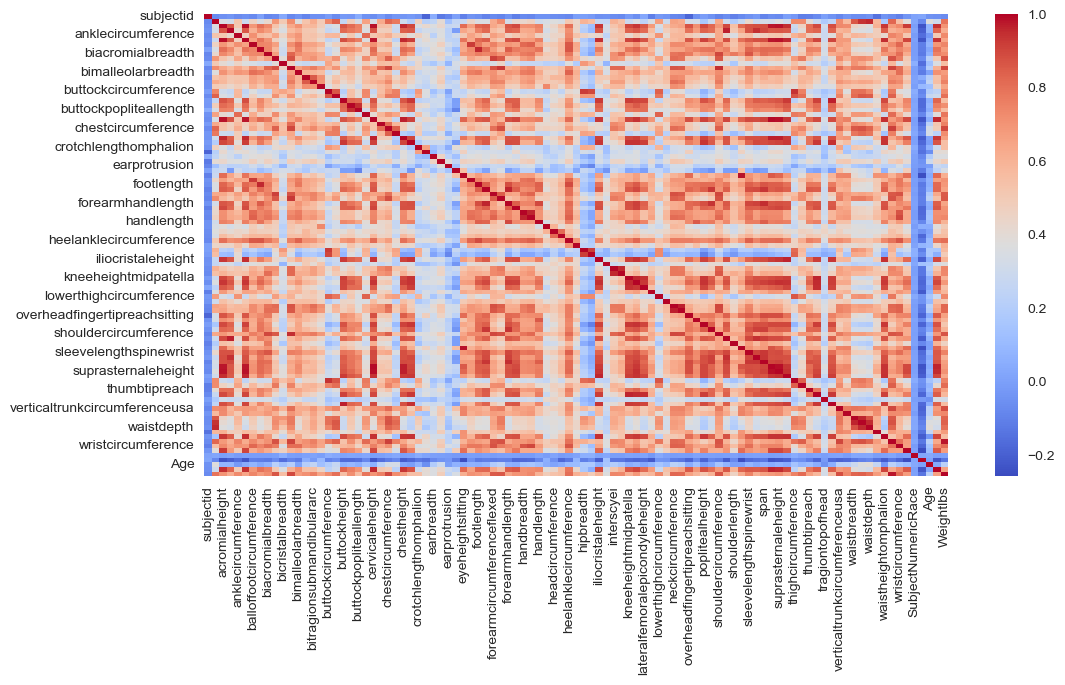

In [354]:
sns.heatmap(df.corr(), cmap ="coolwarm")

<AxesSubplot:>

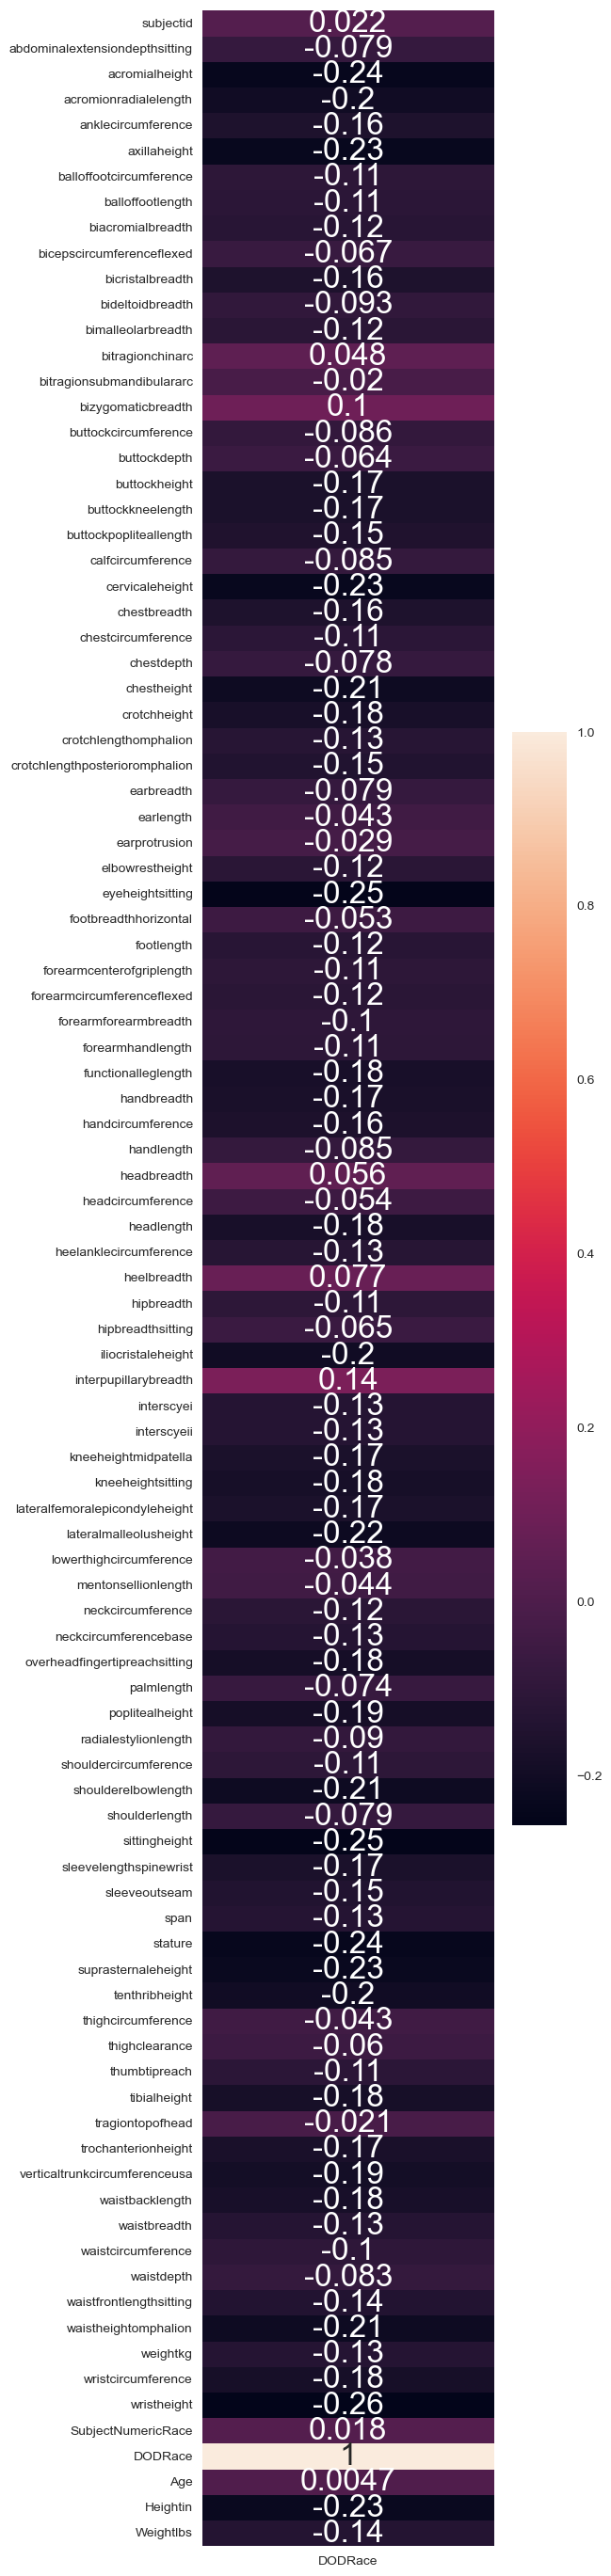

In [355]:
plt.figure(figsize=(5,35))
corr = df.corr()[['DODRace']]
sns.heatmap(corr, annot=True)

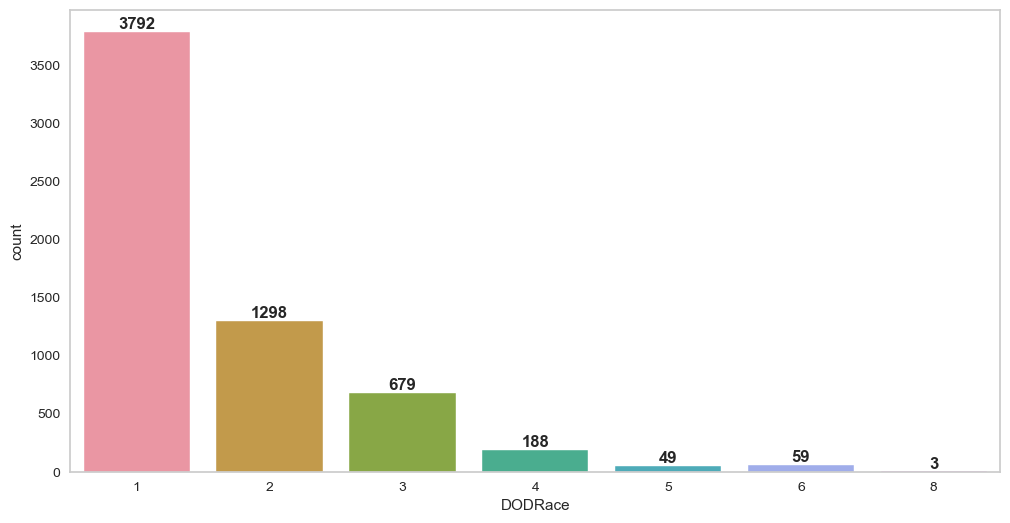

In [356]:
# to show the proportion of each class
g = sns.countplot(df["DODRace"])
g.bar_label(g.containers[0], fontsize=12, weight='bold');

In [357]:
df = df[df['DODRace'].isin([1,2,3])]
df["DODRace"] = df.DODRace.map({
    1: "White",
    2: "Black",
    3: "Hispanic"
})

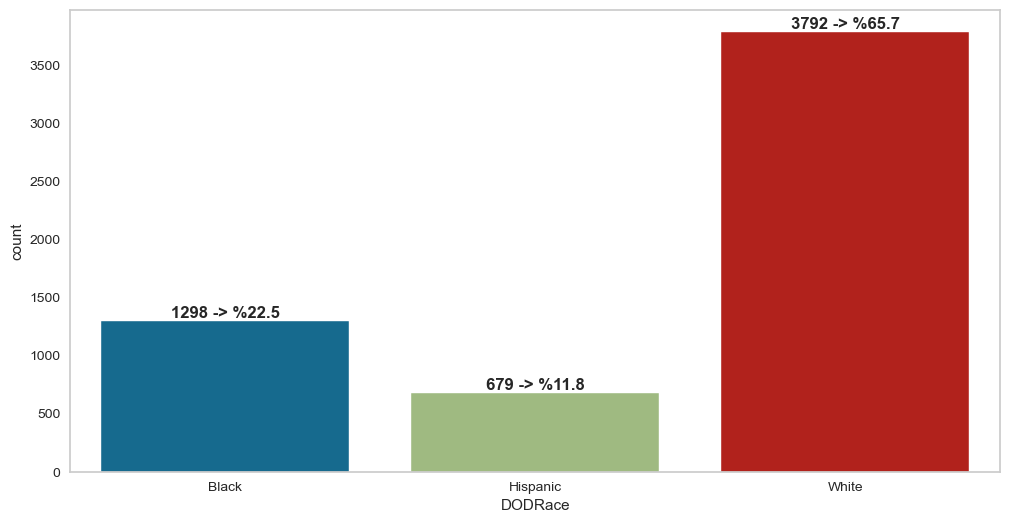

In [358]:
# to show the proportion of each class
g = sns.countplot(df["DODRace"])
for c in g.containers:
    # custom label calculates percent and add an empty string so 0 value bars don't have a number
    labels = [f'{h} -> %{h/df["DODRace"].count()*100:0.1f}' if (h:=v.get_height()) > 0 else '' for v in c]
    g.bar_label(c, labels=labels, fontsize=12, weight='bold')

In [359]:
df.reset_index(inplace=True,drop=True)
df.shape

(5769, 108)

In [360]:
df.info(max_cols=110)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5769 entries, 0 to 5768
Data columns (total 108 columns):
 #    Column                          Non-Null Count  Dtype 
---   ------                          --------------  ----- 
 0    subjectid                       5769 non-null   int64 
 1    abdominalextensiondepthsitting  5769 non-null   int64 
 2    acromialheight                  5769 non-null   int64 
 3    acromionradialelength           5769 non-null   int64 
 4    anklecircumference              5769 non-null   int64 
 5    axillaheight                    5769 non-null   int64 
 6    balloffootcircumference         5769 non-null   int64 
 7    balloffootlength                5769 non-null   int64 
 8    biacromialbreadth               5769 non-null   int64 
 9    bicepscircumferenceflexed       5769 non-null   int64 
 10   bicristalbreadth                5769 non-null   int64 
 11   bideltoidbreadth                5769 non-null   int64 
 12   bimalleolarbreadth              

In [361]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5769 entries, 0 to 5768
Data columns (total 108 columns):
 #    Column                          Dtype 
---   ------                          ----- 
 0    subjectid                       int64 
 1    abdominalextensiondepthsitting  int64 
 2    acromialheight                  int64 
 3    acromionradialelength           int64 
 4    anklecircumference              int64 
 5    axillaheight                    int64 
 6    balloffootcircumference         int64 
 7    balloffootlength                int64 
 8    biacromialbreadth               int64 
 9    bicepscircumferenceflexed       int64 
 10   bicristalbreadth                int64 
 11   bideltoidbreadth                int64 
 12   bimalleolarbreadth              int64 
 13   bitragionchinarc                int64 
 14   bitragionsubmandibulararc       int64 
 15   bizygomaticbreadth              int64 
 16   buttockcircumference            int64 
 17   buttockdepth                   

In [362]:
df.groupby(["Component"])["DODRace"].value_counts(normalize=True)

Component            DODRace 
Army National Guard  White      0.71
                     Black      0.19
                     Hispanic   0.10
Army Reserve         White      0.55
                     Black      0.25
                     Hispanic   0.20
Regular Army         White      0.62
                     Black      0.25
                     Hispanic   0.13
Name: DODRace, dtype: float64

<AxesSubplot:ylabel='Component,DODRace'>

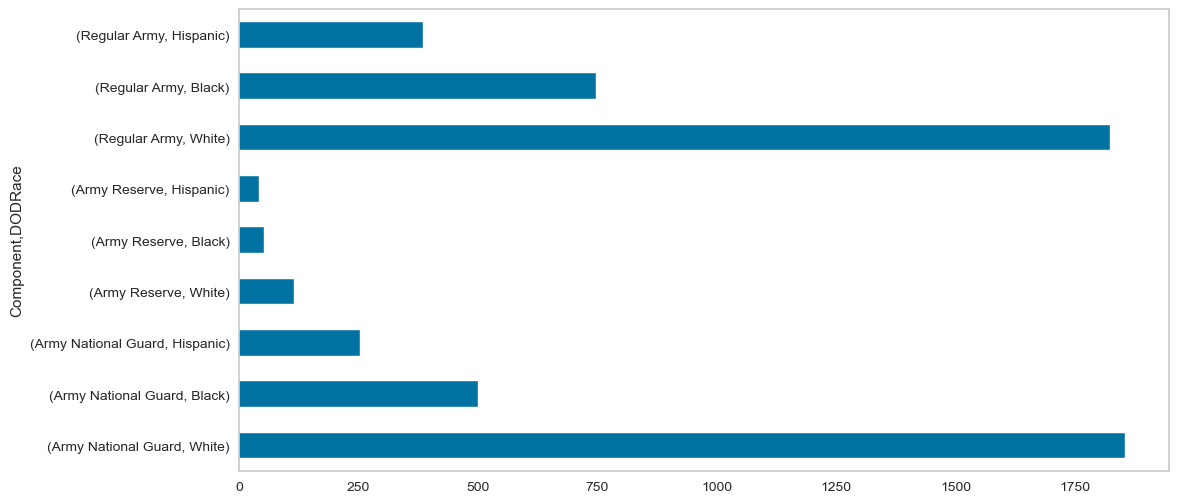

In [363]:
df.groupby(["Component"])["DODRace"].value_counts().plot(kind="barh")

In [364]:
df.groupby(["Component", "Branch"])["DODRace"].value_counts(normalize=True)

Component            Branch                  DODRace 
Army National Guard  Combat Arms             White      0.80
                                             Black      0.10
                                             Hispanic   0.10
                     Combat Service Support  White      0.67
                                             Black      0.23
                                             Hispanic   0.10
                     Combat Support          White      0.68
                                             Black      0.23
                                             Hispanic   0.08
Army Reserve         Combat Arms             White      0.83
                                             Hispanic   0.17
                     Combat Service Support  White      0.60
                                             Hispanic   0.22
                                             Black      0.18
                     Combat Support          Black      0.43
                               

In [365]:
df.drop(["subjectid", "PrimaryMOS", "SubjectNumericRace", "Date", "Installation","Ethnicity","Heightin","Weightlbs", "Component", "Branch" ], axis=1, inplace=True)

# DATA Preprocessing
- In this step we divide our data to X(Features) and y(Target) then ,
- To train and evaluation purposes we create train and test sets,
- Lastly, scale our data if features not in same scale. Why?

### Split and Dummy

In [366]:
X = df.drop(columns=["DODRace"])
y = df["DODRace"]

In [367]:
cat = X.select_dtypes("object").columns
cat 

Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object')

In [368]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=101)

In [369]:
column_trans = make_column_transformer((OneHotEncoder(handle_unknown="ignore", sparse=False), cat), 
                                       remainder=MinMaxScaler())

In [370]:
# def trans_2_OneHotEncoder(X_train, X_test):
    
#     cat = X_train.select_dtypes("object").columns.to_list()    
#     enc = OneHotEncoder(handle_unknown="ignore", sparse=False)
    
#     X_train_cat = pd.DataFrame(enc.fit_transform(X_train[cat]), index = X_train.index, 
#                            columns = enc.get_feature_names_out(cat))    
#     X_test_cat  = pd.DataFrame(enc.transform(X_test[cat]), index = X_test.index, 
#                                columns = enc.get_feature_names_out(cat))
    
#     X_train = X_train_cat.join(X_train.select_dtypes("number"))
#     X_test = X_test_cat.join(X_test.select_dtypes("number"))
        
#     return X_train, X_test
# X_train,X_test = trans_2_OneHotEncoder(X_train, X_test)

In [371]:
X_train.shape,X_test.shape

((4615, 97), (1154, 97))

In [372]:
X_train.head()

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,SubjectsBirthLocation,Age,WritingPreference
958,299,1340,322,238,1241,236,184,365,356,316,483,68,335,316,137,1110,268,833,625,523,392,1412,279,1100,291,1209,787,639,299,32,66,22,230,757,99,255,332,308,518,444,1071,82,197,183,149,584,197,333,77,390,440,1011,590,380,390,463,527,488,61,447,121,354,390,1257,108,391,235,1066,338,130,865,820,540,1642,1639,1342,1070,645,181,776,443,136,868,1677,492,385,1113,305,403,953,862,168,812,Female,New York,28,Right hand
265,239,1399,321,234,1297,244,184,372,335,296,450,67,318,293,139,1115,251,865,616,501,404,1476,266,966,253,1217,810,645,391,33,58,19,234,805,97,244,330,292,505,456,1108,86,204,179,146,569,195,322,69,381,439,1053,645,381,399,463,530,474,70,415,119,324,361,1399,107,406,258,1037,349,137,913,835,558,1728,1712,1408,1116,675,181,749,462,130,893,1631,464,331,930,214,385,1028,765,167,840,Female,Ohio,37,Right hand
4388,223,1429,336,224,1324,241,199,421,319,261,493,78,324,307,136,981,211,861,597,491,381,1500,288,1005,229,1286,842,567,318,31,67,19,218,781,97,272,331,279,527,466,1115,84,200,182,141,553,199,346,75,332,360,1028,620,420,455,475,535,486,74,382,130,375,405,1401,117,432,260,1153,367,157,904,886,590,1802,1736,1415,1102,588,167,790,458,134,875,1626,476,309,870,202,364,1042,746,174,822,Male,Nevada,31,Right hand
3666,226,1489,365,224,1375,264,197,430,371,267,521,75,354,336,142,1014,240,915,642,520,367,1586,306,1039,236,1308,850,644,371,35,62,21,274,892,103,267,370,334,578,503,1151,93,228,205,161,587,201,344,74,333,373,1100,635,417,430,468,557,487,64,402,124,412,467,1545,118,431,271,1221,393,149,1012,933,625,1933,1850,1511,1145,628,191,820,463,142,906,1704,511,294,841,200,422,1098,880,181,865,Male,Iowa,22,Right hand
2721,268,1364,316,237,1258,258,199,398,371,262,512,71,320,298,141,1028,249,840,625,515,417,1437,281,1089,271,1211,827,588,333,34,58,29,192,708,107,266,347,311,604,477,1142,87,212,197,151,570,198,333,74,347,380,1016,690,399,416,475,562,477,72,419,124,385,419,1337,116,432,270,1165,352,135,821,871,572,1794,1660,1360,1064,626,172,770,458,135,875,1569,441,325,981,248,364,1013,844,173,779,Male,North Carolina,42,Right hand


# Modelling
- Fit the model with train dataset
- Get predict from vanilla model on both train and test sets to examine if there is over/underfitting   
- Apply GridseachCV for both hyperparemeter tuning and sanity test of our model.
- Use hyperparameters that you find from gridsearch and make final prediction and evaluate the result according to chosen metric.

## 1. Logistic model

### Vanilla Logistic Model

In [373]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [374]:
operations = [("OneHotEncoder", column_trans), ("log", LogisticRegression(class_weight='balanced',max_iter=10000,
                                                                          random_state=101))]
pipe_log_model = Pipeline(steps=operations)

In [375]:
pipe_log_model.fit(X_train,y_train)
eval_metric(pipe_log_model, X_train, y_train, X_test, y_test)

Test_Set
[[243  11   6]
 [  8 102  26]
 [ 23  99 636]]
              precision    recall  f1-score   support

       Black       0.89      0.93      0.91       260
    Hispanic       0.48      0.75      0.59       136
       White       0.95      0.84      0.89       758

    accuracy                           0.85      1154
   macro avg       0.77      0.84      0.80      1154
weighted avg       0.88      0.85      0.86      1154


Train_Set
[[ 971   36   31]
 [  19  461   63]
 [  61  357 2616]]
              precision    recall  f1-score   support

       Black       0.92      0.94      0.93      1038
    Hispanic       0.54      0.85      0.66       543
       White       0.97      0.86      0.91      3034

    accuracy                           0.88      4615
   macro avg       0.81      0.88      0.83      4615
weighted avg       0.91      0.88      0.89      4615



In [376]:
scoring = {"f1_Hispanic" : make_scorer(f1_score, average = None, labels =["Hispanic"]),
           "precision_Hispanic" : make_scorer(precision_score, average = None, labels =["Hispanic"]),
           "recall_Hispanic" : make_scorer(recall_score, average = None, labels =["Hispanic"])}

### Cross Validation

In [377]:
operations = [("OneHotEncoder", column_trans), ("log", LogisticRegression(class_weight='balanced',max_iter=10000,
                                                                          random_state=101))]

model = Pipeline(steps=operations)

scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_f1_Hispanic          0.61
test_precision_Hispanic   0.50
test_recall_Hispanic      0.79
dtype: float64

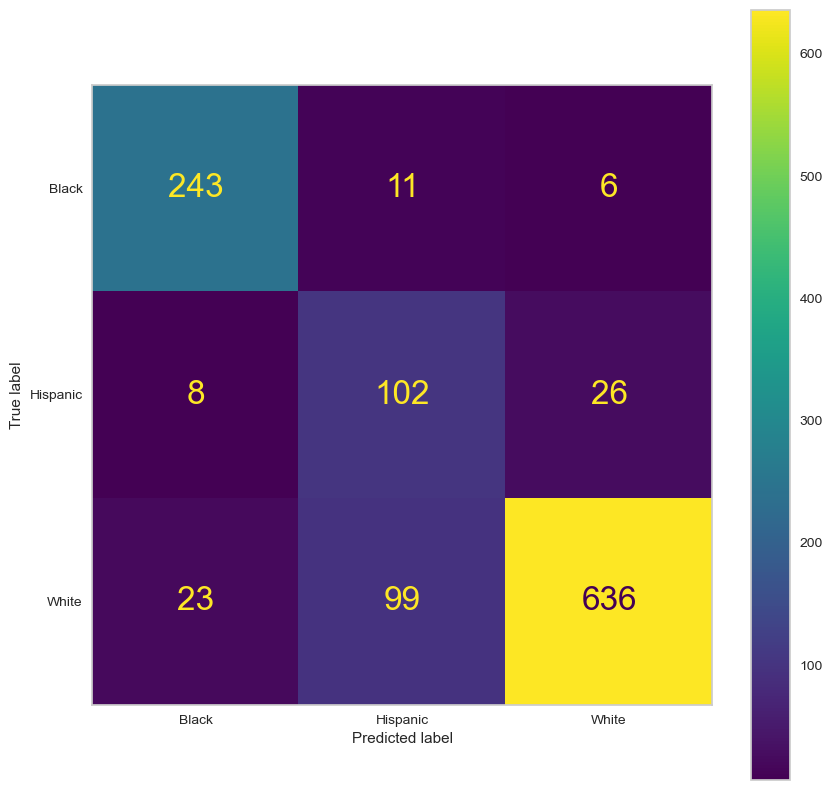

In [378]:
fig, ax = plt.subplots(figsize=(10, 10))
plt.rcParams['font.size'] = '24'
plot_confusion_matrix(pipe_log_model, X_test, y_test, ax=ax)

### Logistic Model GridsearchCV

In [379]:
recall_Hispanic =  make_scorer(recall_score, average=None, labels=["Hispanic"])

In [380]:
param_grid = {
    "log__C": [1, 5, 10],
    'log__penalty': ["l1", "l2"],
    "log__class_weight" : [None, "balanced"],
    'log__solver': ["liblinear",'lbfgs'],
}

In [381]:
operations = [("OneHotEncoder", column_trans), ("log", LogisticRegression(class_weight='balanced',
                                                                          random_state=101))]

model = Pipeline(steps=operations)

log_model_grid = GridSearchCV(model,
                              param_grid,
                              scoring=recall_Hispanic,
                              n_jobs=-1, cv=5)

In [382]:
log_model_grid.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('OneHotEncoder',
                                        ColumnTransformer(remainder=MinMaxScaler(),
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                                       ('log',
                                        LogisticRegression(class_weight='balanced',
                                                           random_state=101))]),
             n_jobs=-1,
             param_grid={'log__C': [1, 5, 10],
                         'log__class_weight': [None, 'balanced'],
                         'log__penalty': ['l1', 'l2'],
                         'log__solver': ['liblinear', 'lbfgs']},
             scoring=make_scorer(recall_score, average=None, labels=['Hispanic']))

In [383]:
log_model_grid.best_params_

{'log__C': 1,
 'log__class_weight': 'balanced',
 'log__penalty': 'l2',
 'log__solver': 'lbfgs'}

In [384]:
eval_metric(log_model_grid, X_train, y_train, X_test, y_test)

Test_Set
[[242  12   6]
 [  8 102  26]
 [ 23  98 637]]
              precision    recall  f1-score   support

       Black       0.89      0.93      0.91       260
    Hispanic       0.48      0.75      0.59       136
       White       0.95      0.84      0.89       758

    accuracy                           0.85      1154
   macro avg       0.77      0.84      0.80      1154
weighted avg       0.88      0.85      0.86      1154


Train_Set
[[ 970   37   31]
 [  19  461   63]
 [  61  353 2620]]
              precision    recall  f1-score   support

       Black       0.92      0.93      0.93      1038
    Hispanic       0.54      0.85      0.66       543
       White       0.97      0.86      0.91      3034

    accuracy                           0.88      4615
   macro avg       0.81      0.88      0.83      4615
weighted avg       0.91      0.88      0.89      4615



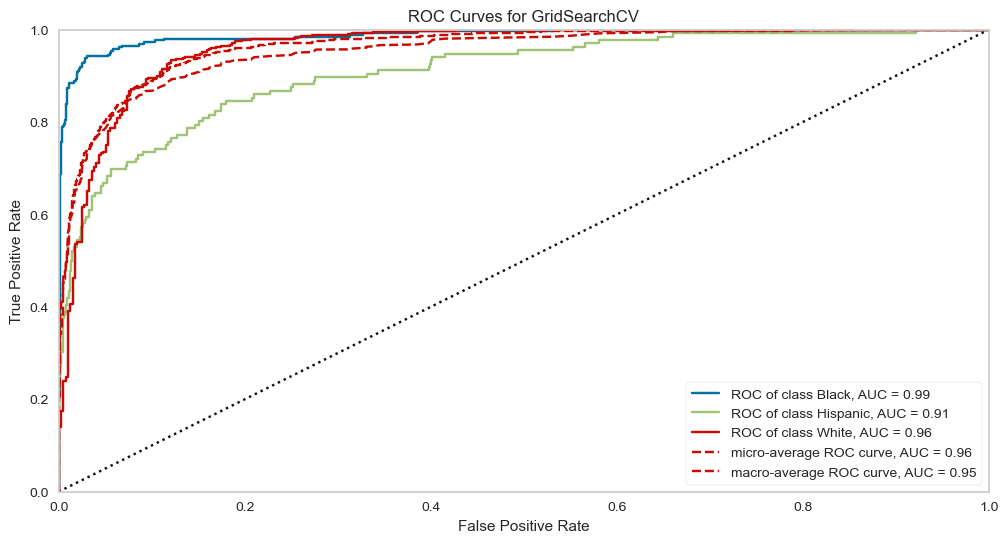

In [385]:
# for grid model with best hyperparameters

from yellowbrick.classifier import ROCAUC
model = log_model_grid
visualizer = ROCAUC(model)

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show();  

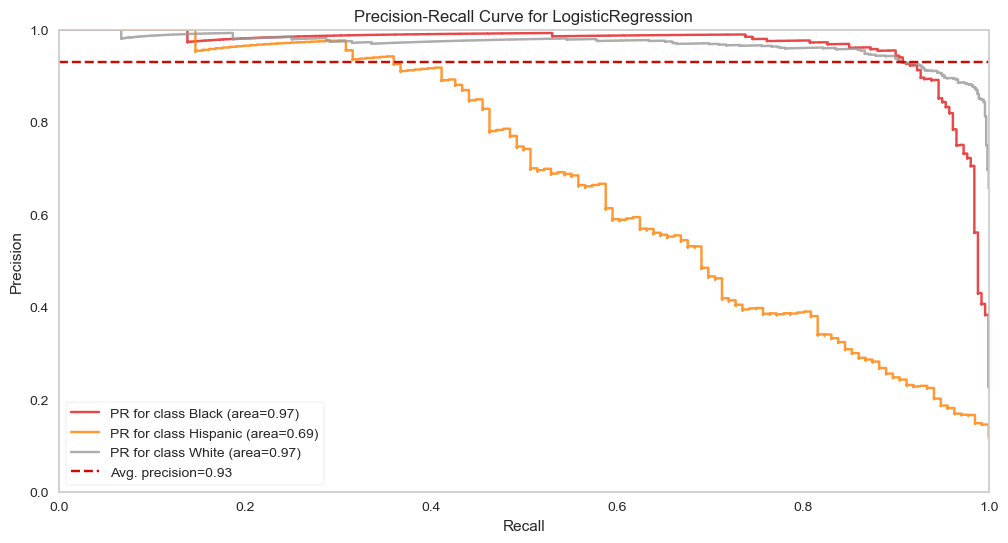

In [386]:
from yellowbrick.classifier import PrecisionRecallCurve

operations = [("OneHotEncoder", column_trans), ("log", LogisticRegression(class_weight='balanced',max_iter=10000,
                                                                          random_state=101))]

model = Pipeline(steps=operations)

viz = PrecisionRecallCurve(
    model,
    per_class=True, classes= ["Black", "Hispanic", "White"],
    cmap="Set1"
)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

In [387]:
viz.score_#["Hispanic"]

{'Black': 0.9665818496175841,
 'Hispanic': 0.6870337075533297,
 'White': 0.9683124938135643,
 'micro': 0.9311203362065554}

In [388]:
y_pred = log_model_grid.predict(X_test)

log_AP = viz.score_["Hispanic"]
log_f1 = f1_score(y_test, y_pred, average=None, labels=["Hispanic"])
log_recall = recall_score(y_test, y_pred, average=None, labels=["Hispanic"])

## 2. SVC

### Vanilla SVC model 

In [389]:
operations_svc = [("OneHotEncoder", column_trans), ("svc", SVC(class_weight="balanced",random_state=101))]

pipe_svc_model = Pipeline(steps=operations_svc)

pipe_svc_model.fit(X_train, y_train)

eval_metric(pipe_svc_model, X_train, y_train, X_test, y_test)

Test_Set
[[240  13   7]
 [  7 102  27]
 [ 21 127 610]]
              precision    recall  f1-score   support

       Black       0.90      0.92      0.91       260
    Hispanic       0.42      0.75      0.54       136
       White       0.95      0.80      0.87       758

    accuracy                           0.82      1154
   macro avg       0.75      0.83      0.77      1154
weighted avg       0.87      0.82      0.84      1154


Train_Set
[[ 959   38   41]
 [  21  458   64]
 [  58  438 2538]]
              precision    recall  f1-score   support

       Black       0.92      0.92      0.92      1038
    Hispanic       0.49      0.84      0.62       543
       White       0.96      0.84      0.89      3034

    accuracy                           0.86      4615
   macro avg       0.79      0.87      0.81      4615
weighted avg       0.90      0.86      0.87      4615



### Cross Validation

In [390]:
model = Pipeline(steps=operations_svc)

scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 5)
df_scores = pd.DataFrame(scores, index = range(1, 6))
df_scores.mean()[2:]

test_f1_Hispanic          0.57
test_precision_Hispanic   0.45
test_recall_Hispanic      0.78
dtype: float64

###  SVC Model GridsearchCV

In [391]:
param_grid = {
    'svc__C': [1,2],
    'svc__gamma': ["scale", "auto", 1, 0.1, 0.01]
}

operations_svc = [("OneHotEncoder", column_trans), ("svc", SVC(class_weight="balanced",random_state=101))]

model = Pipeline(steps=operations_svc)

svm_model_grid = GridSearchCV(model,
                              param_grid,
                              scoring=recall_Hispanic,
                              n_jobs=-1)

In [392]:
svm_model_grid.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('OneHotEncoder',
                                        ColumnTransformer(remainder=MinMaxScaler(),
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                                       ('svc',
                                        SVC(class_weight='balanced',
                                            random_state=101))]),
             n_jobs=-1,
             param_grid={'svc__C': [1, 2],
                         'svc__gamma': ['scale', 'auto', 1, 0.1, 0.01]},
             scoring=make_scorer(recall_score, average=None, labels=['Hispanic']))

In [393]:
svm_model_grid.best_params_

{'svc__C': 2, 'svc__gamma': 0.01}

In [394]:
svm_model_grid.best_score_

0.7771831464492015

In [395]:
eval_metric(svm_model_grid, X_train, y_train, X_test, y_test)

Test_Set
[[239  12   9]
 [  9  96  31]
 [ 16 145 597]]
              precision    recall  f1-score   support

       Black       0.91      0.92      0.91       260
    Hispanic       0.38      0.71      0.49       136
       White       0.94      0.79      0.86       758

    accuracy                           0.81      1154
   macro avg       0.74      0.80      0.75      1154
weighted avg       0.86      0.81      0.83      1154


Train_Set
[[ 931   49   58]
 [  27  444   72]
 [  61  508 2465]]
              precision    recall  f1-score   support

       Black       0.91      0.90      0.91      1038
    Hispanic       0.44      0.82      0.58       543
       White       0.95      0.81      0.88      3034

    accuracy                           0.83      4615
   macro avg       0.77      0.84      0.79      4615
weighted avg       0.88      0.83      0.85      4615



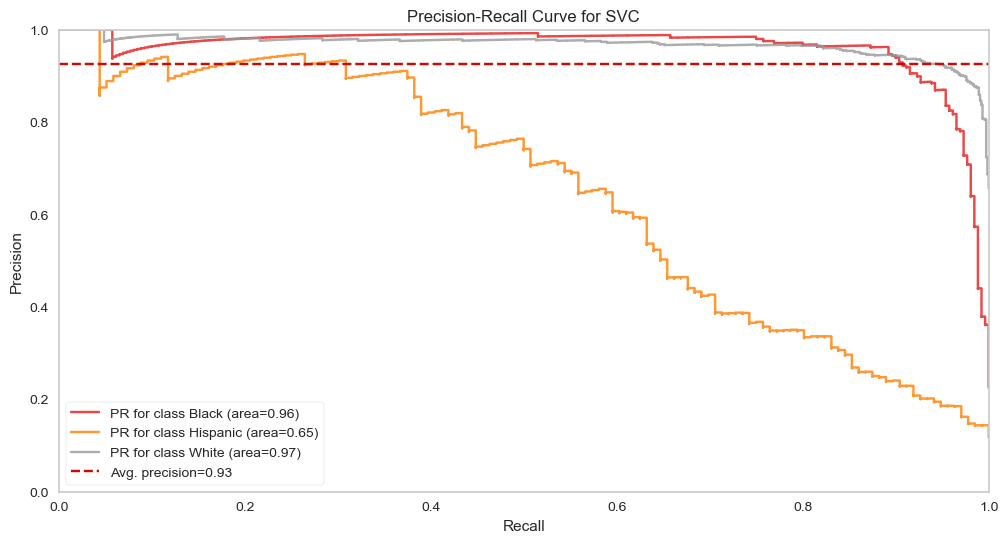

In [396]:
operations_svc = [("OneHotEncoder", column_trans), ("svc", SVC(C=2, class_weight="balanced",random_state=101))]

model = Pipeline(steps=operations_svc)

viz = PrecisionRecallCurve(
    model,
    per_class=True, classes= ["Black", "Hispanic", "White"],
    cmap="Set1"
)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

In [397]:
y_pred = svm_model_grid.predict(X_test)

svc_AP = viz.score_["Hispanic"]
svc_f1 = f1_score(y_test, y_pred, average=None, labels=["Hispanic"])
svc_recall = recall_score(y_test, y_pred, average=None, labels=["Hispanic"])

## 3. RF

In [398]:
ord_enc = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

column_trans = make_column_transformer((ord_enc, cat), remainder='passthrough')

### Vanilla RF Model

In [399]:
operations_rf = [("OrdinalEncoder", column_trans), ("RF_model", RandomForestClassifier(class_weight="balanced", 
                                                                                    random_state=101))]

pipe_model_rf = Pipeline(steps=operations_rf)

pipe_model_rf.fit(X_train, y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                ('RF_model',
                 RandomForestClassifier(class_weight='balanced',
                                        random_state=101))])

In [400]:
eval_metric(pipe_model_rf, X_train, y_train, X_test, y_test)

Test_Set
[[179   0  81]
 [  6   8 122]
 [  8   0 750]]
              precision    recall  f1-score   support

       Black       0.93      0.69      0.79       260
    Hispanic       1.00      0.06      0.11       136
       White       0.79      0.99      0.88       758

    accuracy                           0.81      1154
   macro avg       0.90      0.58      0.59      1154
weighted avg       0.84      0.81      0.77      1154


Train_Set
[[1038    0    0]
 [   0  543    0]
 [   0    0 3034]]
              precision    recall  f1-score   support

       Black       1.00      1.00      1.00      1038
    Hispanic       1.00      1.00      1.00       543
       White       1.00      1.00      1.00      3034

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615



In [401]:
operations_rf = [("OrdinalEncoder", column_trans), ("RF_model", RandomForestClassifier(class_weight="balanced", 
                                                                                    random_state=101))]

model = Pipeline(steps=operations_rf)

scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 5)
df_scores = pd.DataFrame(scores, index = range(1, 6))
df_scores.mean()[2:]

test_f1_Hispanic          0.08
test_precision_Hispanic   0.76
test_recall_Hispanic      0.04
dtype: float64

### RF Model GridsearchCV

In [402]:
param_grid = {'RF_model__n_estimators':[400,500],
             'RF_model__max_depth':[2,3]}

operations_rf = [("OrdinalEncoder", column_trans), ("RF_model", RandomForestClassifier(class_weight="balanced", 
                                                                                    random_state=101))]

model = Pipeline(steps=operations_rf)
rf_grid_model = GridSearchCV(model,
                             param_grid,
                             scoring=recall_Hispanic,
                             n_jobs=-1)

In [403]:
%%time
rf_grid_model.fit(X_train,y_train)

CPU times: total: 4.58 s
Wall time: 24.4 s


GridSearchCV(estimator=Pipeline(steps=[('OrdinalEncoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                                       ('RF_model',
                                        RandomForestClassifier(class_weight='balanced',
                                                               random_state=101))]),
             n_jobs=-1,
             param_grid={'RF_model__max_depth': [2, 3],
                         'RF_model__n_estimators': [400, 500]},
             scoring=make_scorer(recall_score, average=None, labels=['Hispanic']))

In [404]:
rf_grid_model.best_score_

0.5817533129459734

In [405]:
eval_metric(rf_grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[198  41  21]
 [ 22  83  31]
 [ 65 238 455]]
              precision    recall  f1-score   support

       Black       0.69      0.76      0.73       260
    Hispanic       0.23      0.61      0.33       136
       White       0.90      0.60      0.72       758

    accuracy                           0.64      1154
   macro avg       0.61      0.66      0.59      1154
weighted avg       0.77      0.64      0.68      1154


Train_Set
[[ 810  126  102]
 [  57  330  156]
 [ 272  955 1807]]
              precision    recall  f1-score   support

       Black       0.71      0.78      0.74      1038
    Hispanic       0.23      0.61      0.34       543
       White       0.88      0.60      0.71      3034

    accuracy                           0.64      4615
   macro avg       0.61      0.66      0.60      4615
weighted avg       0.76      0.64      0.67      4615



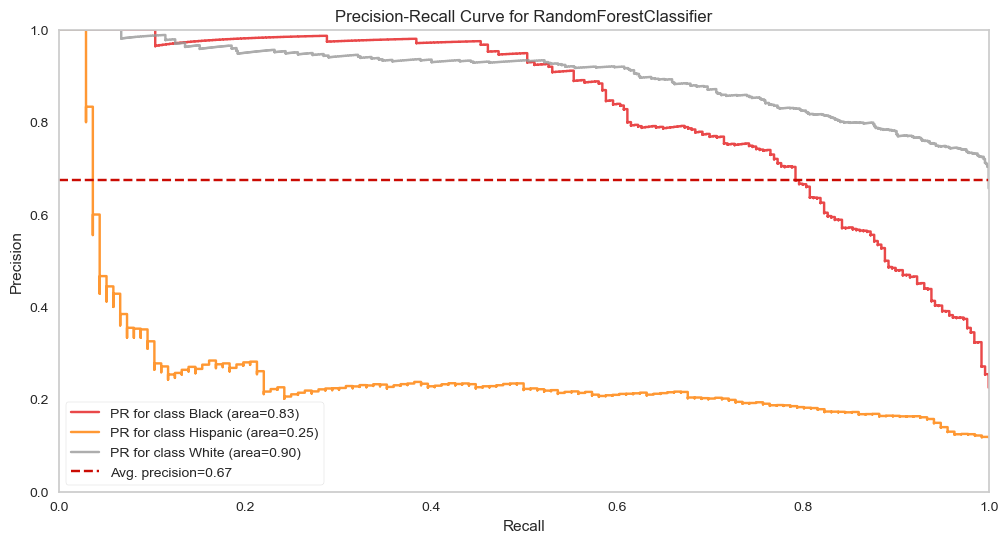

In [406]:
operations_rf = [("OrdinalEncoder", column_trans), ("RF_model", RandomForestClassifier(class_weight="balanced", 
                                                    max_depth=2, n_estimators=400, random_state=101))]

model = Pipeline(steps=operations_rf)

viz = PrecisionRecallCurve(
    model,
    per_class=True, classes= ["Black", "Hispanic", "White"],
    cmap="Set1"
)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

In [407]:
y_pred = rf_grid_model.predict(X_test)

rf_AP = viz.score_["Hispanic"]
rf_f1 = f1_score(y_test, y_pred, average=None, labels=["Hispanic"])
rf_recall = recall_score(y_test, y_pred, average=None, labels=["Hispanic"])

## 4. XGBoost

### Vanilla XGBoost Model

In [408]:
xgb.__version__

'1.6.2'

In [409]:
df["DODRace"] = df.DODRace.map({
    "White":0,
    "Black":1,
    "Hispanic":2
})

X = df.drop(columns=["DODRace"])
y = df["DODRace"]

cat = X.select_dtypes("object").columns
cat 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=101)

In [410]:
operations_xgb = [("OrdinalEncoder", column_trans), ("XGB_model", XGBClassifier(random_state=101))]

pipe_model_xgb = Pipeline(steps=operations_xgb)

pipe_model_xgb.fit(X_train, y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                ('XGB_model',
                 XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
                               colsample_bylevel=1...
                               gamma=0, gpu_id=-1, grow_policy='depthwise',
                               importance_type=None, interaction_constraints='',
                               learning_rate=0.300000012, max_bin=256,
                               max_cat_to_onehot=4, max_delta_step=0,
                               max_depth=6, max_leaves=0, min_child_weight=1,
                               missing=nan, monotone_constraints='()',
                               n_estimators=100, n_jobs=0, num_parallel_tree=1,
                               objective='multi:softprob', predictor='auto',
                               random_state=101, reg_alpha=0, ...))])

In [411]:
from sklearn.utils import class_weight
classes_weights = class_weight.compute_sample_weight(class_weight='balanced', y=y_train)
classes_weights

array([2.8330264 , 2.8330264 , 0.50703142, ..., 0.50703142, 0.50703142,
       0.50703142])

In [412]:
comp = pd.DataFrame(classes_weights)

comp["label"] = y_train.reset_index(drop=True)
comp.groupby("label")[0].value_counts()

label  0   
0      0.51    3034
1      1.48    1038
2      2.83     543
Name: 0, dtype: int64

In [413]:
pipe_model_xgb.fit(X_train,y_train, XGB_model__sample_weight=classes_weights)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                ('XGB_model',
                 XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
                               colsample_bylevel=1...
                               gamma=0, gpu_id=-1, grow_policy='depthwise',
                               importance_type=None, interaction_constraints='',
                               learning_rate=0.300000012, max_bin=256,
                               max_cat_to_onehot=4, max_delta_step=0,
                               max_depth=6, max_leaves=0, min_child_weight=1,
                               missing=nan, monotone_constraints='()',
                               n_estimators=100, n_jobs=0, num_parallel_tree=1,
                               objective='multi:softprob', predictor='auto',
                               random_state=101, reg_alpha=0, ...))])

In [414]:
eval_metric(pipe_model_xgb, X_train, y_train, X_test, y_test)

Test_Set
[[709  18  31]
 [ 27 231   2]
 [ 67   9  60]]
              precision    recall  f1-score   support

           0       0.88      0.94      0.91       758
           1       0.90      0.89      0.89       260
           2       0.65      0.44      0.52       136

    accuracy                           0.87      1154
   macro avg       0.81      0.75      0.77      1154
weighted avg       0.86      0.87      0.86      1154


Train_Set
[[3034    0    0]
 [   0 1038    0]
 [   0    0  543]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3034
           1       1.00      1.00      1.00      1038
           2       1.00      1.00      1.00       543

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615



In [415]:
scoring = {
    "f1_2" : make_scorer(f1_score, average = None, labels=[2]),
    "precision_2" : make_scorer(precision_score, average = None, labels=[2]),
    "recall_2" : make_scorer(recall_score, average = None, labels=[2])
}

In [416]:
operations_xgb = [("OrdinalEncoder", column_trans), ("XGB_model", XGBClassifier(random_state=101))]

model = Pipeline(steps=operations_xgb)

scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 5,
                        fit_params={"XGB_model__sample_weight":classes_weights})
df_scores = pd.DataFrame(scores, index = range(1, 6))
df_scores.mean()[2:]

test_f1_2          0.57
test_precision_2   0.70
test_recall_2      0.48
dtype: float64

### XGBoost Model GridsearchCV

In [417]:
param_grid = {"XGB_model__n_estimators":[50, 100],
              'XGB_model__max_depth':[1,2],
              "XGB_model__learning_rate": [0.1, 0.3],
              "XGB_model__subsample":[0.8, 1],
              "XGB_model__colsample_bytree":[0.8, 1]}

In [418]:
recall_Hispanic =  make_scorer(recall_score, average=None, labels=[2])

operations_xgb = [("OrdinalEncoder", column_trans), ("XGB_model", XGBClassifier(random_state=101))]

model = Pipeline(steps=operations_xgb)

xgb_grid_model = GridSearchCV(model, 
                              param_grid, 
                              scoring=recall_Hispanic, 
                              n_jobs = -1).fit(X_train, y_train, XGB_model__sample_weight=classes_weights)

In [419]:
xgb_grid_model.best_estimator_

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                ('XGB_model',
                 XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
                               colsample_bylevel=1...
                               gamma=0, gpu_id=-1, grow_policy='depthwise',
                               importance_type=None, interaction_constraints='',
                               learning_rate=0.3, max_bin=256,
                               max_cat_to_onehot=4, max_delta_step=0,
                               max_depth=2, max_leaves=0, min_child_weight=1,
                               missing=nan, monotone_constraints='()',
                               n_estimators=50, n_jobs=0, num_parallel_tree=1,
                               objective='multi:softprob', predictor='auto',
                               random_state=101, reg_alpha=0, ...))])

In [420]:
xgb_grid_model.best_params_

{'XGB_model__colsample_bytree': 0.8,
 'XGB_model__learning_rate': 0.3,
 'XGB_model__max_depth': 2,
 'XGB_model__n_estimators': 50,
 'XGB_model__subsample': 1}

In [421]:
xgb_grid_model.best_score_

0.6704383282364933

In [422]:
eval_metric(xgb_grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[589  34 135]
 [ 16 228  16]
 [ 40  15  81]]
              precision    recall  f1-score   support

           0       0.91      0.78      0.84       758
           1       0.82      0.88      0.85       260
           2       0.35      0.60      0.44       136

    accuracy                           0.78      1154
   macro avg       0.70      0.75      0.71      1154
weighted avg       0.83      0.78      0.79      1154


Train_Set
[[2492  119  423]
 [  44  946   48]
 [  76   33  434]]
              precision    recall  f1-score   support

           0       0.95      0.82      0.88      3034
           1       0.86      0.91      0.89      1038
           2       0.48      0.80      0.60       543

    accuracy                           0.84      4615
   macro avg       0.77      0.84      0.79      4615
weighted avg       0.88      0.84      0.85      4615



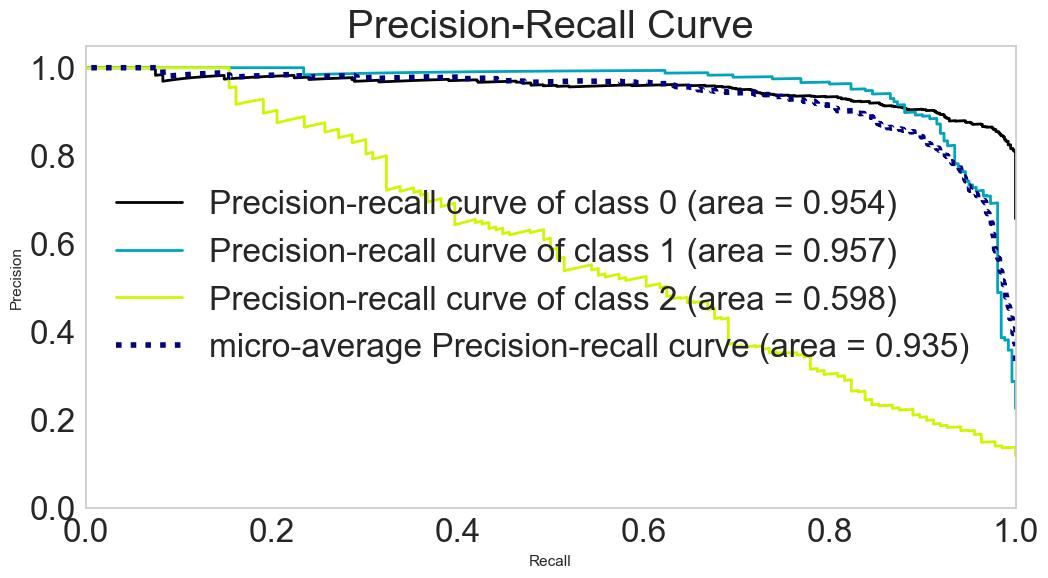

In [423]:
from scikitplot.metrics import plot_precision_recall

perations_xgb = [("OrdinalEncoder", column_trans), ("XGB_model", XGBClassifier(learning_rate=0.3, max_depth=1,
                            random_state=101, subsample=0.8))]

model = Pipeline(steps=operations_xgb)

model.fit(X_train, y_train, XGB_model__sample_weight=classes_weights)

y_pred_proba = model.predict_proba(X_test)
#y_pred = model.predict(X_test)
#Plot metrics 
#plot_roc(y_test, y_score)
#plt.show()
    
plot_precision_recall(y_test, y_pred_proba)
plt.show()

In [424]:
y_test_dummies = pd.get_dummies(y_test, drop_first=False).values

average_precision_score(y_test_dummies[:, 1], y_pred_proba[:, 1])

0.9571988134811171

In [425]:
y_pred = xgb_grid_model.predict(X_test)

xgb_AP = average_precision_score(y_test_dummies[:, 1], y_pred_proba[:, 1])
xgb_f1 = f1_score(y_test, y_pred, average=None, labels=[2])
xgb_recall = recall_score(y_test, y_pred, average=None, labels=[2])

## Comparing Models

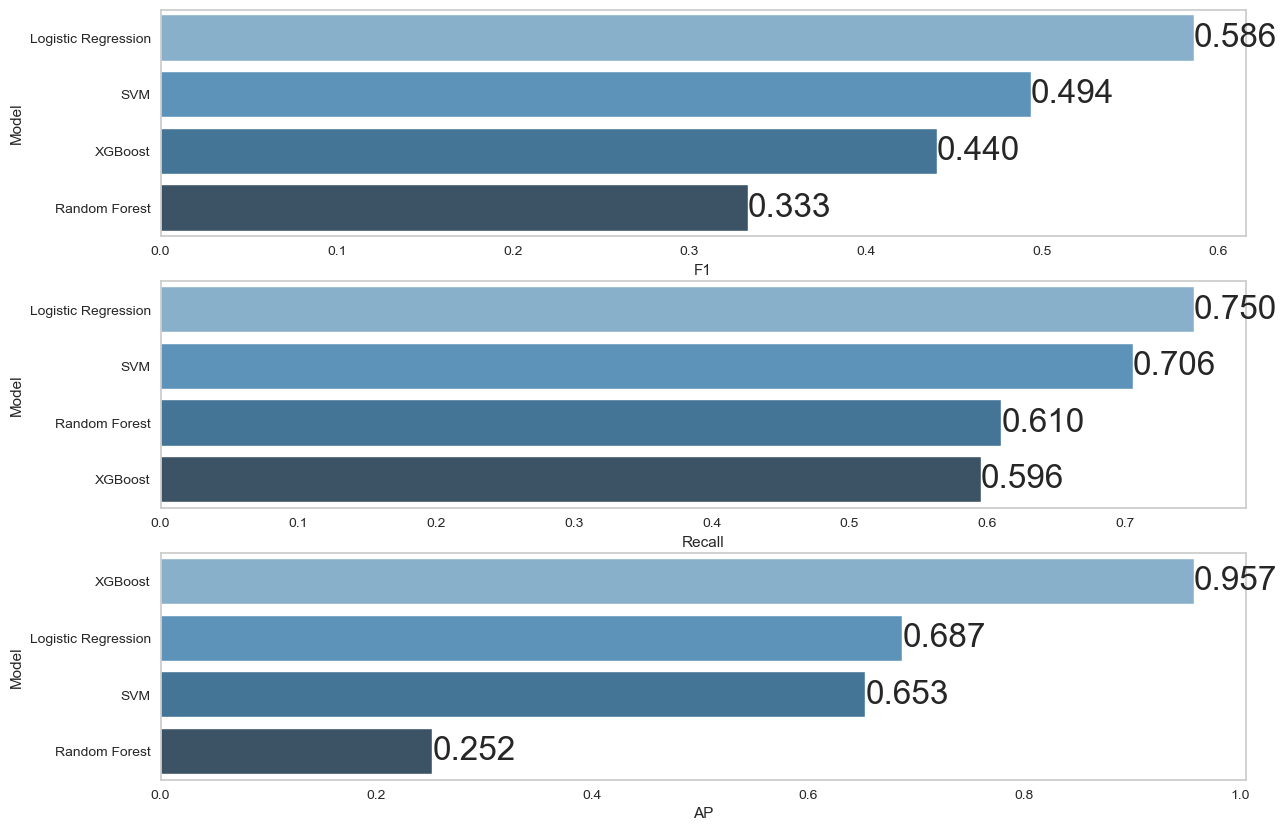

In [426]:
compare = pd.DataFrame({"Model": ["Logistic Regression", "SVM",  "Random Forest", "XGBoost"],
                        "F1": [log_f1[0], svc_f1[0], rf_f1[0], xgb_f1[0]],
                        "Recall": [log_recall[0], svc_recall[0], rf_recall[0], xgb_recall[0]],
                        "AP": [log_AP, svc_AP, rf_AP, xgb_AP]})

def labels(ax):
    for p in ax.patches:
        width = p.get_width()                        # get bar length
        ax.text(width,                               # set the text at 1 unit right of the bar
                p.get_y() + p.get_height() / 2,      # get Y coordinate + X coordinate / 2
                '{:1.3f}'.format(width),             # set variable to display, 2 decimals
                ha = 'left',                         # horizontal alignment
                va = 'center')                       # vertical alignment
    
plt.figure(figsize=(14,10))
plt.subplot(311)
compare = compare.sort_values(by="F1", ascending=False)
ax=sns.barplot(x="F1", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(312)
compare = compare.sort_values(by="Recall", ascending=False)
ax=sns.barplot(x="Recall", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(313)
compare = compare.sort_values(by="AP", ascending=False)
ax=sns.barplot(x="AP", y="Model", data=compare, palette="Blues_d")
labels(ax)
plt.show()

# SMOTE
https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

##  Smote implement

In [442]:
# !pip install imblearn

In [527]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as imbpipeline

In [528]:
column_trans = make_column_transformer((OneHotEncoder(handle_unknown="ignore", sparse=False), cat), 
                                       remainder=MinMaxScaler())

X_train_ohe = column_trans.fit_transform(X_train)

over = SMOTE()
X_over, y_over = over.fit_resample(X_train_ohe, y_train)

In [529]:
X_over.shape

(9102, 225)

In [530]:
y_over.value_counts()

2    3034
0    3034
1    3034
Name: DODRace, dtype: int64

In [531]:
X_under.shape

(1629, 225)

In [532]:
y_under.value_counts()

0    543
1    543
2    543
Name: DODRace, dtype: int64

In [533]:
under = RandomUnderSampler()
X_under, y_under = under.fit_resample(X_train_ohe, y_train)


In [534]:
X_resampled_over, y_resampled_over = over.fit_resample(X_train_ohe, y_train)

In [535]:
X_under.shape

(1629, 225)

In [536]:
y_under.value_counts()

0    543
1    543
2    543
Name: DODRace, dtype: int64

In [537]:
over = SMOTE(sampling_strategy={2: 1000})
under = RandomUnderSampler(sampling_strategy={0: 2500})

In [538]:
X_resampled_under, y_resampled_under = under.fit_resample(X_train_ohe, y_train)

In [539]:
y_resampled_under.value_counts()

0    2500
1    1038
2     543
Name: DODRace, dtype: int64

In [540]:
# we are configuring our pipeline steps
steps = [('o', over), ('u', under)]

# create a pipeline that will automatically apply over and under
# sampling in order to steps that we created.
pipeline = imbpipeline(steps=steps)

# we will create new data over X_train and y_train.
# We simply delete some of our samples if its race "white" and we add synthetic samples to "hispanics".
X_resampled, y_resampled = pipeline.fit_resample(X_train_ohe, y_train)

## Logistic Regression Over/Under Sampling

In [541]:
column_trans = make_column_transformer((OneHotEncoder(handle_unknown="ignore", sparse=False), cat), 
                                       remainder=MinMaxScaler())

In [542]:
operations = [("OneHotEncoder",column_trans), ('o', over), ('u', under), 
              ("log", LogisticRegression(max_iter=10000,random_state=101))] #("scaler", MinMaxScaler())

smote_pipeline = imbpipeline(steps=operations)

In [543]:
smote_pipeline.fit(X_train, y_train)

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                ('o', SMOTE(sampling_strategy={2: 1000})),
                ('u', RandomUnderSampler(sampling_strategy={0: 2500})),
                ('log', LogisticRegression(max_iter=10000, random_state=101))])

In [544]:
eval_metric(smote_pipeline, X_train, y_train, X_test, y_test)

Test_Set
[[701  11  46]
 [ 12 243   5]
 [ 44   5  87]]
              precision    recall  f1-score   support

           0       0.93      0.92      0.93       758
           1       0.94      0.93      0.94       260
           2       0.63      0.64      0.64       136

    accuracy                           0.89      1154
   macro avg       0.83      0.83      0.83      1154
weighted avg       0.89      0.89      0.89      1154


Train_Set
[[2866   27  141]
 [  62  952   24]
 [ 127   25  391]]
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      3034
           1       0.95      0.92      0.93      1038
           2       0.70      0.72      0.71       543

    accuracy                           0.91      4615
   macro avg       0.86      0.86      0.86      4615
weighted avg       0.91      0.91      0.91      4615



## Xgboost Over/ Under Sampling

- Evaluation metrics 
https://towardsdatascience.com/comprehensive-guide-on-multiclass-classification-metrics-af94cfb83fbd

In [ ]:
from sklearn.metrics import matthews_corrcoef

matthews_corrcoef(y_test, y_pred)

0.7380728719663084

In [ ]:
from sklearn.metrics import cohen_kappa_score

cohen_kappa_score(y_test, y_pred)

0.7376215262514891

#  SHAP

https://towardsdatascience.com/shap-explain-any-machine-learning-model-in-python-24207127cad7

In [407]:
!pip install shap

In [ ]:
import shap
explainer = shap.Explainer(log_model,X_train)
start_index = 203
end_index = 204
shap_values = explainer.shap_values(X_test[start_index:end_index])

In [ ]:
shap_values

In [ ]:
print(shap_values[0].shape)

(1, 232)


In [ ]:
# %% >> Visualize local predictions
shap.initjs()
# Force plot
prediction = log_model.predict(X_test[start_index:end_index])[0]
print(f"The log_model predicted: {prediction}")
shap.force_plot(explainer.expected_value[1],
                shap_values[1],
                X_test[start_index:end_index], # for values
                feature_names= X.columns,) 

In [ ]:
shap.summary_plot(shap_values, X_train,max_display=300,feature_names = X.columns)

# Before the Deployment 
- Choose the model that works best based on your chosen metric
- For final step, fit the best model with whole dataset to get better performance.
- And your model ready to deploy, dump your model and scaler.

In [490]:
column_trans_final = make_column_transformer((OneHotEncoder(handle_unknown="ignore", sparse=False), cat), 
                                       remainder=MinMaxScaler())

operations_final = [("OneHotEncoder",column_trans_final),("log", LogisticRegression(class_weight='balanced',max_iter=10000,
                                                                          random_state=101))]

final_model = Pipeline(steps=operations_final)

In [491]:
final_model.fit(X, y)

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                ('log',
                 LogisticRegression(class_weight='balanced', max_iter=10000,
                                    random_state=101))])

In [492]:
X.describe()

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Age
count,5769.00,5769.00,5769.00,5769.00,5769.00,5769.00,5769.00,5769.00,5769.00,5769.00,5769.00,5769.00,5769.00,5769.00,5769.00,5769.00,5769.00,5769.00,5769.00,5769.00,5769.00,5769.00,5769.00,5769.00,5769.00,5769.00,5769.00,5769.00,5769.00,5769.00,5769.00,5769.00,5769.00,5769.00,5769.00,5769.00,5769.00,5769.00,5769.00,5769.00,5769.00,5769.00,5769.00,5769.00,5769.00,5769.00,5769.00,5769.00,5769.00,5769.00,5769.00,5769.00,5769.00,5769.00,5769.00,5769.00,5769.00,5769.00,5769.00,5769.00,5769.00,5769.00,5769.00,5769.00,5769.00,5769.00,5769.00,5769.00,5769.00,5769.00,5769.00,5769.00,5769.00,5769.00,5769.00,5769.00,5769.00,5769.00,5769.00,5769.00,5769.00,5769.00,5769.00,5769.00,5769.00,5769.00,5769.00,5769.00,5769.00,5769.00,5769.00,5769.00,5769.00,5769.00
mean,247.25,1408.63,328.07,225.20,1301.90,244.41,195.12,399.71,341.66,274.90,491.45,72.34,324.96,306.68,139.53,1022.06,242.23,872.11,610.45,498.33,386.32,1479.95,283.23,1024.21,252.32,1254.29,827.11,622.69,351.88,35.18,62.61,22.23,240.55,786.40,98.92,263.51,339.46,295.66,553.10,467.90,1104.35,85.10,204.22,189.57,152.04,570.42,196.64,333.27,70.83,348.93,386.42,1042.15,632.53,412.77,433.02,476.67,541.38,484.32,69.76,406.94,119.60,376.13,414.55,1390.53,114.11,417.23,259.76,1131.21,354.81,145.20,898.59,868.36,578.01,1766.95,1716.94,1405.39,1101.63,623.58,176.70,791.04,459.39,129.58,884.66,1632.47,460.99,318.41,916.82,230.46,377.35,1033.59,800.98,169.31,831.33,29.78
std,37.46,78.30,20.44,15.97,71.26,16.80,13.38,30.12,41.27,19.24,42.01,5.33,17.05,20.82,7.25,75.95,26.41,54.06,33.12,28.51,30.58,83.59,20.61,100.38,26.66,78.88,54.06,45.09,29.81,3.22,4.86,3.15,28.60,41.84,6.66,17.23,23.08,29.86,62.26,29.79,67.72,6.32,15.49,11.42,6.18,18.25,8.32,22.26,5.93,25.19,32.27,59.10,36.64,42.87,38.51,32.64,33.74,28.98,7.25,33.10,7.86,39.72,38.04,85.52,7.11,30.95,19.62,92.35,22.33,12.39,45.26,56.90,37.91,109.93,89.26,78.01,59.79,57.53,16.12,53.49,29.27,6.64,53.77,98.20,36.71,36.40,114.39,35.69,31.71,61.96,155.99,13.06,47.32,8.71
min,155.00,1146.00,249.00,156.00,1062.00,186.00,151.00,283.00,216.00,197.00,357.00,55.00,267.00,245.00,116.00,737.00,168.00,656.00,479.00,380.00,266.00,1208.00,213.00,695.00,170.00,1000.00,610.00,473.00,243.00,25.00,46.00,13.00,138.00,654.00,77.00,210.00,258.00,200.00,376.00,342.00,835.00,67.00,160.00,150.00,131.00,502.00,168.00,258.00,48.00,264.00,280.00,8

In [493]:
mean_human = X.describe(include="all").loc["mean"]
mean_human

abdominalextensiondepthsitting    247.25
acromialheight                   1408.63
acromionradialelength             328.07
anklecircumference                225.20
axillaheight                     1301.90
balloffootcircumference           244.41
balloffootlength                  195.12
biacromialbreadth                 399.71
bicepscircumferenceflexed         341.66
bicristalbreadth                  274.90
bideltoidbreadth                  491.45
bimalleolarbreadth                 72.34
bitragionchinarc                  324.96
bitragionsubmandibulararc         306.68
bizygomaticbreadth                139.53
buttockcircumference             1022.06
buttockdepth                      242.23
buttockheight                     872.11
buttockkneelength                 610.45
buttockpopliteallength            498.33
calfcircumference                 386.32
cervicaleheight                  1479.95
chestbreadth                      283.23
chestcircumference               1024.21
chestdepth      

In [494]:
mean_human["Gender"] = "Male"
mean_human["SubjectsBirthLocation"] = "California"
mean_human["WritingPreference"] = "Right hand"

In [495]:
pd.DataFrame(mean_human).T

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,SubjectsBirthLocation,Age,WritingPreference
mean,247.25,1408.63,328.07,225.20,1301.90,244.41,195.12,399.71,341.66,274.90,491.45,72.34,324.96,306.68,139.53,1022.06,242.23,872.11,610.45,498.33,386.32,1479.95,283.23,1024.21,252.32,1254.29,827.11,622.69,351.88,35.18,62.61,22.23,240.55,786.40,98.92,263.51,339.46,295.66,553.10,467.90,1104.35,85.10,204.22,189.57,152.04,570.42,196.64,333.27,70.83,348.93,386.42,1042.15,632.53,412.77,433.02,476.67,541.38,484.32,69.76,406.94,119.60,376.13,414.55,1390.53,114.11,417.23,259.76,1131.21,354.81,145.20,898.59,868.36,578.01,1766.95,1716.94,1405.39,1101.63,623.58,176.70,791.04,459.39,129.58,884.66,1632.47,460.99,318.41,916.82,230.46,377.35,1033.59,800.98,169.31,831.33,Male,California,29.78,Right hand


In [497]:
y[201]

2

In [498]:
final_model.predict(X.loc[[201]])

array([2], dtype=int64)

In [499]:
from sklearn.metrics import matthews_corrcoef

y_pred = final_model.predict(X_test)

matthews_corrcoef(y_test, y_pred)

0.7660592782537383

In [500]:
from sklearn.metrics import cohen_kappa_score

cohen_kappa_score(y_test, y_pred)

0.7574919674606115

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___